# Credit Card Default Probability

Objective: Estimate the probability of payment defualt of credit card holders in Taiwan
<br>
Author: Michael Perrotte
<br>
Dataset: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [1]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [2]:
# Retrieve data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
df = pd.read_excel(url, skiprows=1)

## Initial Data Exploration
- Print columns
- View first 5 rows
- Summary statistics for each variable

In [3]:
# Take a look at the columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
# Print the first 5 rows
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# Summary Stats
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


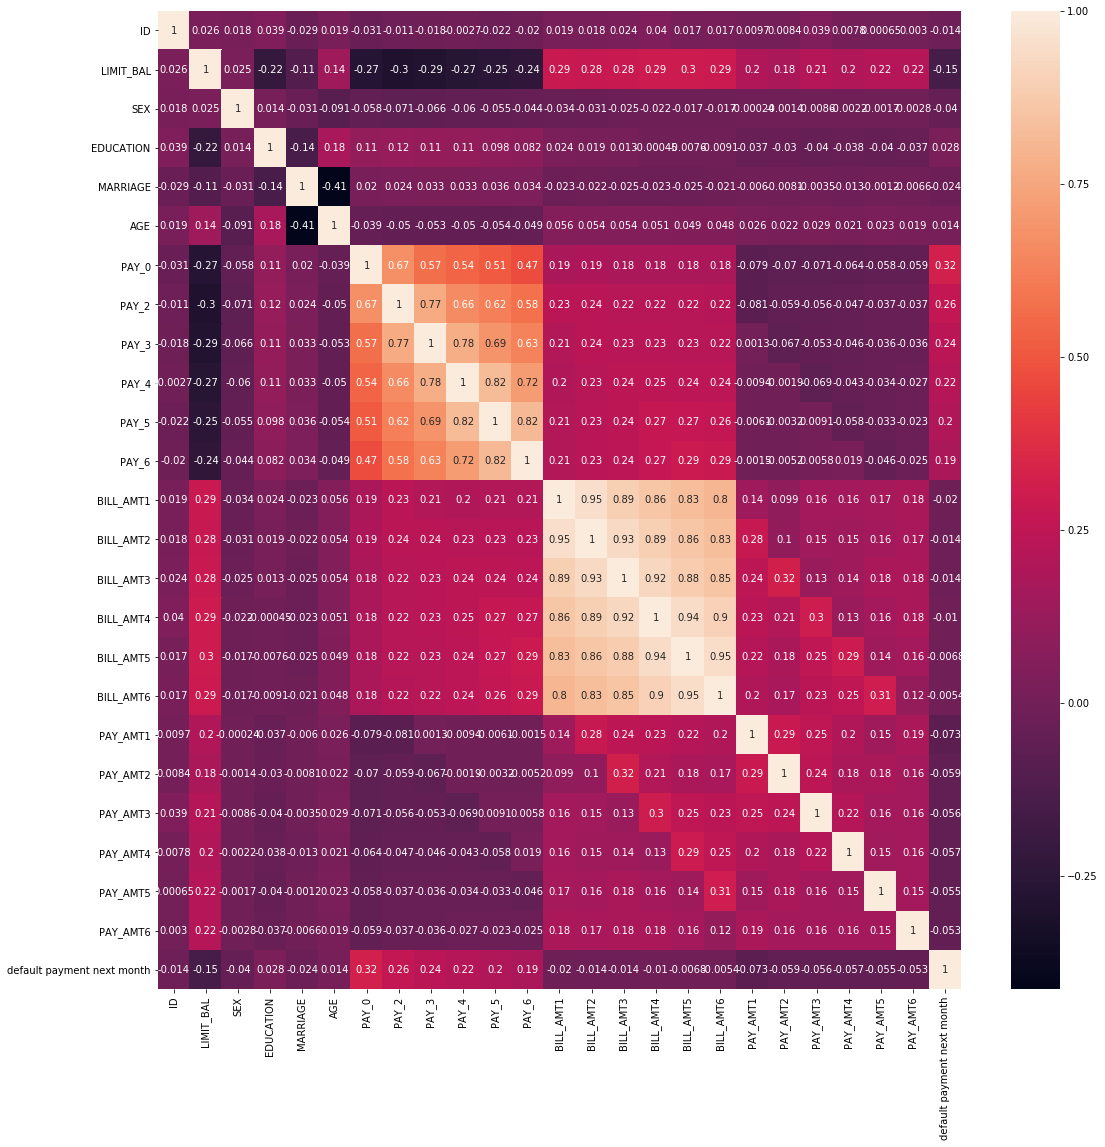

In [6]:
# Correlations between variables - Pay 0-6 appear to be the strongest indicators
fig, ax = plt.subplots(figsize=(18, 18)) 
sns.heatmap(df.corr(), annot=True)

In [7]:
# Distribution of default payment field
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

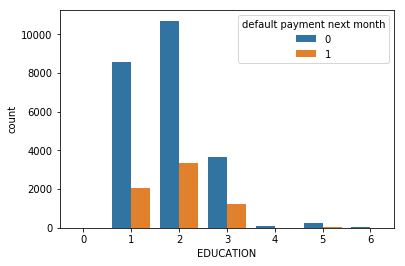

In [8]:
# Look at the number of defaults in the education column that are not 1-4
sns.countplot(df.EDUCATION, hue=df['default payment next month'])

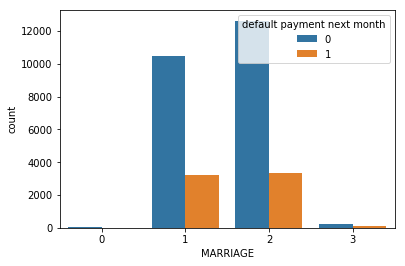

In [9]:
# Investigate the zero values in the marriage column
sns.countplot(df['MARRIAGE'], hue=df['default payment next month'])

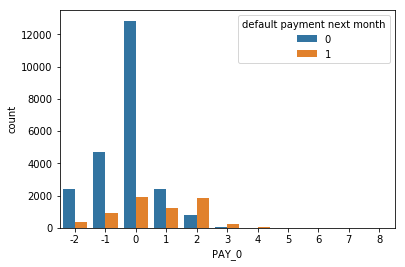

In [10]:
# There are a substantial amount of -2 values in the PAY variables, so will leave for now given the number of default payments
sns.countplot(df['PAY_0'], hue=df['default payment next month'])

## Implement Data Preprocessing Steps

#### Basic Preprocessing Steps
- Drop the ID column
- Remove rows with values not described in the attribute descriptions
- Scale the currency values
- Split into training/test data

In [11]:
# Drop the ID column
df = df.drop(columns='ID')

In [12]:
# Remove the values not listed under the attribute information
df = df[df['EDUCATION'] < 4]
df = df[df['EDUCATION'] != 0]

df = df[df['MARRIAGE'] != 0]

#### Split the training, validation, and test data

In [13]:
# Scale the currency values
currency_features = df.columns[11:23]
scaler = MinMaxScaler()
values = df[currency_features]
scaled_values = scaler.fit_transform(values)
df[currency_features] = pd.DataFrame(scaled_values, index=df.index, columns=currency_features)

# 80/20 training/testing split
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:23]], df['default payment next month'], 
                                                    test_size=0.2, stratify=df['default payment next month'])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Explore Analytical Techniques/Models
- Evaluated standard, stratified, and repeated kfold cross validation. Given the class imbalance, utilized stratified kfold in the end. It is the default when setting cv to an integer in an sklearn classification model.
- Utilize accuracy, precision, recall and f1 as the metrics.

In [14]:
metrics = ['accuracy', 'precision', 'recall', 'f1']

In [15]:
def evaluate_model(results):
    print("Accuracy: {:.2%}".format(results['test_accuracy'].mean()))
    print("Precision: {:.2%}".format(results['test_precision'].mean()))
    print("Recall: {:.2%}".format(results['test_recall'].mean()))
    print("F1: {:.2%}".format(results['test_f1'].mean()))

#### Decision Tree

In [16]:
dt_clf = DecisionTreeClassifier(max_depth=5)
results = cross_validate(dt_clf, x_train, y_train, cv=10, scoring=metrics)
evaluate_model(results)

Accuracy: 81.83%
Precision: 67.32%
Recall: 36.78%
F1: 47.52%


#### Random Forest

In [17]:
rf_clf = RandomForestClassifier(n_estimators=30, max_depth=10)
results = cross_validate(rf_clf, x_train, y_train, cv=10, scoring=metrics)
evaluate_model(results)

Accuracy: 81.85%
Precision: 67.79%
Recall: 36.04%
F1: 47.04%


#### Gradient Boosting

In [18]:
gb_clf = GradientBoostingClassifier(n_estimators=100)
results = cross_validate(gb_clf, x_train, y_train, cv=10, scoring=metrics)
evaluate_model(results)

Accuracy: 82.06%
Precision: 68.32%
Recall: 37.10%
F1: 48.05%


#### AdaBoost

In [19]:
ada_clf = AdaBoostClassifier(n_estimators=100)
results = cross_validate(ada_clf, x_train, y_train, cv=10, scoring=metrics)
evaluate_model(results)

Accuracy: 81.52%
Precision: 67.85%
Recall: 33.08%
F1: 44.46%


#### KNN

In [20]:
knn_clf = KNeighborsClassifier(n_neighbors=10)
results = cross_validate(knn_clf, x_train, y_train, cv=10, scoring=metrics)
evaluate_model(results)

Accuracy: 79.62%
Precision: 65.00%
Recall: 19.36%
F1: 29.83%


## Fit Selected Model to the Analytics Ready Dataset
- Given the similarity in the performance metrics of three out of the five models, I selected the top three and utilized an ensemble voting approach to attempt to capture the strengths of each model.

In [21]:
selected_clf = VotingClassifier(estimators=[('gb',gb_clf), ('rf', rf_clf), ('dt', dt_clf)], voting='hard')
selected_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('gb', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, ...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

## Evaluate Model Performance on Test Dataset

#### Predict and Performance Metrics

In [22]:
preds = selected_clf.predict(x_test)

print("Accuracy: {:.2%}".format(accuracy_score(y_test, preds)))
print("Precision: {:.2%}".format(precision_score(y_test, preds)))
print("Recall: {:.2%}".format(recall_score(y_test, preds)))
print("F1: {:.2%}".format(f1_score(y_test, preds)))

Accuracy: 82.02%
Precision: 67.02%
Recall: 38.79%
F1: 49.14%


#### Confusion Matrix
- Overall accuracy was 82%, but unfortunately there are still a large number of false negatives as the model failed to predict 808 instanaces of credit card default in the test set. 

In [23]:
pd.crosstab(y_test, preds, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,4324,252
1,808,512


## Options I Would Have Considered if Allotted Additional Time

- The most critical aspect of any modeling exercise is exploring and understanding the data. Given that I was looking to quickly construct a data exploration and modeling workflow to demonstrate my thought process, my primary objective if alloted additional time would be to invest significantly more time in the initial phases of this notebook.
    - Example: An insufficient amount of time was spent looking into each variable, where it may have been beneficial to understand the other categories in education and maritial status.
- Along those lines, it would be advantageous to spend time feature engineering to improve model performance. A few ideas I would explore first are below:
    - Create binary variables indicating whether or not a person payed each month, regardless of amount or the number of consecutive months.
    - Create variable indicating whether balances were increasing or if the balance was greater than some percent of the limit balance.
    - Bin discretization of variables such as the limit balance or age.
- Another area I took note of but did little to address outside of utilizing the default cross validation approach of stratification for each of the model classifiers is class imbalance. As such, I would have attempted to address the issue through methods such as over or undersampling.
- Hyperparameter tuning would have been another step I would have taken to tune parameters such as tree depth and the number of estimators.
- I also would have attempted to construct a neural network and leveraged one-hot encoding for the categorical variables.